In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Lionel Messi Goals.csv')
data.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,samedi 16 f�vrier 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,samedi 22 d�cembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


In [3]:
data['Date'] = data['Date'].str[-4:]
data['Date'].head(20)

0     2019
1     2019
2     2018
3     2018
4     2018
5     2018
6     2018
7     2018
8     2018
9     2018
10    2018
11    2018
12    2018
13    2017
14    2017
15    2017
16    2017
17    2017
18    2017
19    2017
Name: Date, dtype: object

In [4]:
df = data['Date'].value_counts().reset_index()
df = df.sort_values(by='index', ascending=True)
df

,index,Date
14,2005,3
13,2006,12
10,2007,31
11,2008,22
9,2009,41
1,2010,60
3,2011,59
0,2012,91
8,2013,45
4,2014,58


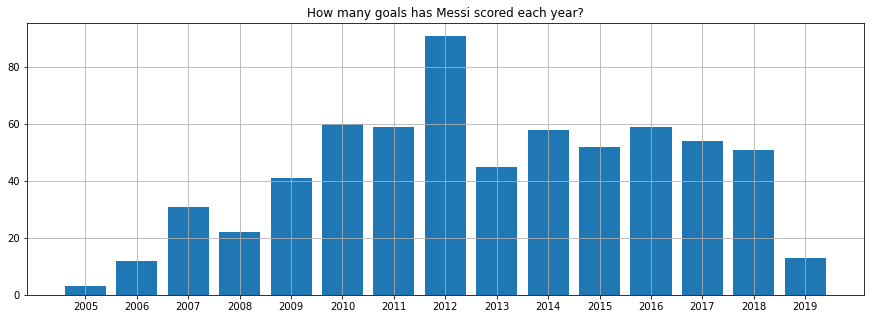

In [5]:
plt.figure(figsize=(15, 5))
plt.bar(df['index'], df['Date'])
plt.title('How many goals has Messi scored each year?')
plt.grid()
plt.show()

In [6]:
df = data[['Goal Type', 'Goal Method']]
df = df.loc[df['Goal Type'] == 'Penalty'].reset_index()
df = df['Goal Method'].value_counts()
df 

Left foot    82
Name: Goal Method, dtype: int64

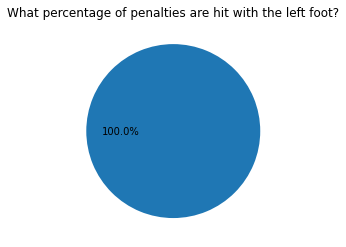

In [7]:
plt.pie(df, autopct='%1.1f%%')
plt.title('What percentage of penalties are hit with the left foot?')
plt.show()

In [8]:
data['Minute'] = data['Minute'].apply(eval)
data['Minute'].head(20)

0     43
1     53
2     45
3     12
4     19
5     92
6     64
7     45
8     32
9     27
10    30
11    26
12    12
13    77
14    71
15    20
16    67
17    26
18    12
19    37
Name: Minute, dtype: int64

In [9]:
df = data[['Minute', 'Final Game Result']]
df = df.loc[df['Minute'] > 90].reset_index()
df

,index,Minute,Final Game Result
0,5,92,Won
1,34,91,Won
2,38,94,Won
3,78,91,Won
4,99,91,Won
5,105,91,Won
6,123,92,Lost
7,175,92,Won
8,187,92,Won
9,190,92,Won


In [10]:
df = df['Final Game Result'].value_counts().reset_index()
df

,index,Final Game Result
0,Won,27
1,Lost,2
2,Draw,1


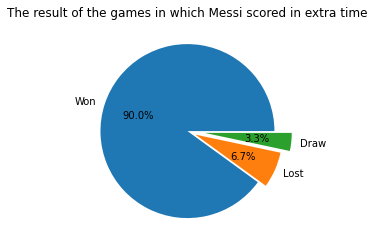

In [11]:
plt.pie(
    df['Final Game Result'],
    labels=df['index'],
    autopct='%1.1f%%',
    explode=(0, 0.1, 0.2)
)
plt.title('The result of the games in which Messi scored in extra time')
plt.show()